## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_meradata_df = mouse_metadata
#mouse_meradata_df.info()
study_results_df = study_results
#study_results_df.info()
# Merge df's
combine_mouse_data = pd.merge(mouse_meradata_df,study_results_df, on=["Mouse ID"])
combine_mouse_data.info()
# Display the data table for preview


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [2]:
# Checking the number of mice.
total_mice = combine_mouse_data["Mouse ID"].nunique()

total_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.  

duplicate_mice = combine_mouse_data.loc[combine_mouse_data.duplicated(["Mouse ID","Timepoint",]),"Mouse ID"].unique()
#duplicate_mice = combine_mouse_data.loc[combine_mouse_data.duplicated(["Mouse ID", "Timepoint",])"Mouse ID].unique()
duplicate_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_data = combine_mouse_data.loc[combine_mouse_data["Mouse ID"]=='g989']

duplicate_mice_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
combine_mouse_data_df = combine_mouse_data

In [6]:
combine_mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID. #used “pandas drop row by condition”
clean_comdata = combine_mouse_data_df[~combine_mouse_data_df["Mouse ID"].isin(duplicate_mice)]
clean_comdata_df = clean_comdata
clean_comdata_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice = clean_comdata_df["Mouse ID"].nunique()
number_mice

248

## Summary Statistics

In [9]:
clean_comdata_df.shape

(1880, 8)

In [10]:

regimen_grp_cleandata = clean_comdata_df.groupby('Drug Regimen')
#regimen_grp_cleandata_df = regimen_grp_cleandata
#regimen_grp_cleandata.count()


In [11]:
## Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean_tumor_vol        = regimen_grp_cleandata["Tumor Volume (mm3)"].mean().round(2)
#mean_tumor_vol
median_tumor_vol      = regimen_grp_cleandata["Tumor Volume (mm3)"].median().round(2)
#median_tumor_vol
variance_tumor_vol     = regimen_grp_cleandata["Tumor Volume (mm3)"].var().round(2)
#variance_tumor_vol
standeviation_tumor_vol=regimen_grp_cleandata["Tumor Volume (mm3)"].std().round(2)
#standeviation_tumor_vol
sem_tumor_sql          = regimen_grp_cleandata["Tumor Volume (mm3)"].sem().round(2)  
sem_tumor_sql
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_df = pd.DataFrame({"Mean" : mean_tumor_vol,
                        "Median" : median_tumor_vol,
                         "Variance" : variance_tumor_vol,
                          "STD" : standeviation_tumor_vol,
                          "SEM" : sem_tumor_sql})
summary_df.head(10)

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


In [12]:
# Generate a summary statistics table of mean, median, variance,standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function

summary_grp_regimen=clean_comdata_df.groupby(['Drug Regimen']).agg ({'Tumor Volume (mm3)':[np.mean,np.median,np.var,np.std, st.sem]}).round(2)
summary_grp_regimen.head(11)



Tumor Volume (mm3)                          
                           mean median    var   std   sem
Drug Regimen                                             
Capomulin                 40.68  41.56  24.95  4.99  0.33
Ceftamin                  52.59  51.78  39.29  6.27  0.47
Infubinol                 52.88  51.82  43.13  6.57  0.49
Ketapril                  55.24  53.70  68.55  8.28  0.60
Naftisol                  54.33  52.51  66.17  8.13  0.60
Placebo                   54.03  52.29  61.17  7.82  0.58
Propriva                  52.32  50.45  43.85  6.62  0.54
Ramicane                  40.22  40.67  23.49  4.85  0.32
Stelasyn                  54.23  52.43  59.45  7.71  0.57
Zoniferol                 53.24  51.82  48.53  6.97  0.52

## Bar and Pie Charts

In [13]:
regimen_grp_cleandata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [14]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

total_number_mice_regimen = regimen_grp_cleandata["Mouse ID"].nunique()
#miceid_regimen = regimen_grp_cleandata[["Drug Regimen","Mouse ID"]]
total_number_mice_regimen.head()

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Name: Mouse ID, dtype: int64

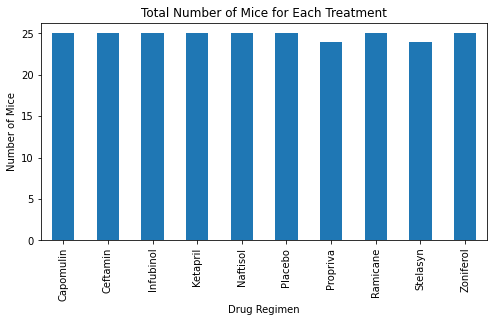

<Figure size 432x288 with 0 Axes>

In [15]:
# Use DataFrame.plot() in order to create a bar chart of the data
total_mice_chart = total_number_mice_regimen.plot(kind="bar", figsize=(8,4))

# Set a title for the chart
plt.title("Total Number of Mice for Each Treatment")
total_mice_chart.set_ylabel("Number of Mice")
plt.show()
plt.tight_layout()

In [16]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
x_axis=np.arange(len(total_number_mice_regimen))
#plt.bar(x_axis, total_number_mice_regimen, color='purple', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
#plt.xticks(tick_locations,total_number_mice_regimen["Drug Regimen"]
#plt.xticks(tick_locations, total_number_mice_regimen["Drug Regimen"], rotation="vertical")
#plt.tight_layout()

In [17]:
# regimen_grp_cleandata.head()
total_number_mice_regimen.columns=["Drug Regimen","Mouse ID"]
total_number_mice_regimen
#df=pd.Dataframe("Drug Regimen")

Drug Regimen
Capomulin    25
Ceftamin     25
Infubinol    25
Ketapril     25
Naftisol     25
Placebo      25
Propriva     24
Ramicane     25
Stelasyn     24
Zoniferol    25
Name: Mouse ID, dtype: int64

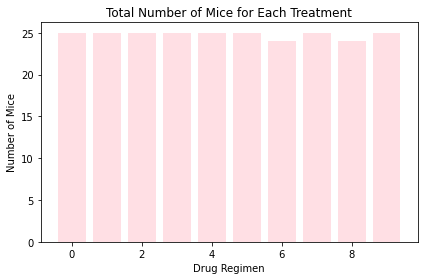

In [18]:
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.bar(x_axis, total_number_mice_regimen, color='pink', alpha=0.5, align="center")
#plt.xticks(tick_locations,total_number_mice_regimen.loc[total_number_mice_regimen["Drug Regimen"]], rotation="vertical")
#["Capomulin","Ceftamin","Infubinol","Ketapril"]Ketapril     25
#Naftisol     25
#Placebo      25
#Propriva     24
#Ramicane     25
#Stelasyn"
#Zoniferol"]], rotation="vertical")
plt.title("Total Number of Mice for Each Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.tight_layout()

In [19]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

micesex=clean_comdata_df["Sex"].value_counts()
micesex

Male      958
Female    922
Name: Sex, dtype: int64

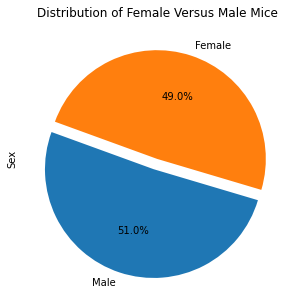

In [20]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
explode = (0.1, 0)
plot = micesex.plot.pie(subplots=True, figsize=(8, 5), explode=explode,startangle=160,autopct="%1.1f%%")
plt.title("Distribution of Female Versus Male Mice")
plt.show()

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Labels for the sections of our pie chart
labels = ["Male Mice", "Female Mice"]

# The values of each section of the pie chart
sizes = [958, 922]

# The colors of each section of the pie chart
colors = ["lightblue", "pink"]

# Tells matplotlib to seperate
explode = (0.1, 0)

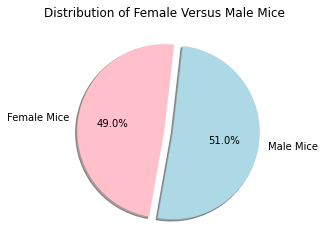

In [22]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("Distribution of Female Versus Male Mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [23]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

Capomulin_data = clean_comdata_df.loc[clean_comdata_df["Drug Regimen"]=="Capomulin",:]
#print(Capomulin_data.shape)

Ramicane_data = clean_comdata_df.loc[clean_comdata_df["Drug Regimen"]=="Ramicane",:]
#print(Ramicane_data.shape)

Infubinol_data = clean_comdata_df.loc[clean_comdata_df["Drug Regimen"]=="Infubinol",:]
print(Infubinol_data.shape)

Ceftamin_data= clean_comdata_df.loc[clean_comdata_df["Drug Regimen"]=="Ceftamin",:]
Ceftamin_data.head()

(178, 8)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1


In [24]:
Capomulin_maxpoint= Capomulin_data.groupby(["Mouse ID"])["Timepoint"].max()
Capomulin_df = pd.DataFrame(Capomulin_maxpoint)
Capomulin_merge = pd.merge(Capomulin_df, clean_comdata_df, on=("Mouse ID","Timepoint"),how="left")
#Capomulin_merge.head()"
#Capomulin_maxpoint_timepoint = Capomulin_maxpoint.stack(level=0").unstack(level=0)

#Capomulin_maxpoint_timepoint
#Capomulin_df

In [25]:
Ramicane_maxpoint= Ramicane_data.groupby(["Mouse ID"])["Timepoint"].max()
Ramicane_df = pd.DataFrame(Ramicane_maxpoint)
Ramicane_merge = pd.merge(Ramicane_df, clean_comdata_df, on=("Mouse ID","Timepoint"),how="left")
#Ramicane_merge.head()


In [26]:
Infubinol_data_maxpoint= Infubinol_data.groupby(["Mouse ID"])["Timepoint"].max()
Infubinol_data_df = pd.DataFrame(Infubinol_data_maxpoint)
Infubinol_merge = pd.merge(Infubinol_data_df, clean_comdata_df, on=("Mouse ID","Timepoint"),how="left")
#Infubinol_data_merge

In [27]:
Ceftamin_data_maxpoint= Ceftamin_data.groupby(["Mouse ID"])["Timepoint"].max()
Ceftamin_data_df = pd.DataFrame(Ceftamin_data_maxpoint)
Ceftamin_merge = pd.merge(Ceftamin_data_df, clean_comdata_df, on=("Mouse ID","Timepoint"),how="left")
#Ceftamin_merge

In [28]:
Regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
drugs = clean_comdata_df[clean_comdata_df["Drug Regimen"].isin(Regimen_list)]
drugs.head()
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drugs.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
#Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
#for drug in drug_list:
 #print(drug)
# Put treatments into a list for for loop (and later for plot labels)  
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locate the rows which contain mice on each drug and get the tumor volumes add subset 
# Determine outliers using upper and lower bounds
treatment = 0
for drug in Regimen_list:
  quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
  lowerq = quartiles[0.25].round(2)
  upperq = quartiles[0.75].round(2)
  iqr = round(upperq-lowerq,2)
  lower_bound = round(lowerq - (1.5*iqr),2)
  upper_bound = round(upperq + (1.5*iqr),2)
  if treatment == 0:
    print(f"------------------------------------------------------------")
  print(f"The lower quartile of {drug} treatments is: {lowerq}")
  print(f"The upper quartile of {drug} treatments is: {upperq}")
  print(f"The interquartile range of {drug} treatments is: {iqr}")
  print(f"Values below {lower_bound} could be {drug} outliers.")
  print(f"Values above {upper_bound} could be {drug} outliers.")
  print(f"------------------------------------------------------------")
  treatment+=1

------------------------------------------------------------
The lower quartile of Capomulin treatments is: 32.38
The upper quartile of Capomulin treatments is: 40.16
The interquartile range of Capomulin treatments is: 7.78
Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.
------------------------------------------------------------
The lower quartile of Ramicane treatments is: 31.56
The upper quartile of Ramicane treatments is: 40.66
The interquartile range of Ramicane treatments is: 9.1
Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.
------------------------------------------------------------
The lower quartile of Infubinol treatments is: 54.05
The upper quartile of Infubinol treatments is: 65.53
The interquartile range of Infubinol treatments is: 11.48
Values below 36.83 could be Infubinol outliers.
Values above 82.75 could be Infubinol outliers.
---------------------------------------------

In [29]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Capomulin_tumor = Capomulin_merge["Tumor Volume (mm3)"]
Ramicare_tumor = Ramicane_merge["Tumor Volume (mm3)"]
Infubinol_tumor = Infubinol_merge["Tumor Volume (mm3)"]
Ceftamin_tumor = Ceftamin_merge["Tumor Volume (mm3)"]
Four_regimen = [Capomulin_tumor,Ramicare_tumor,Infubinol_tumor,Ceftamin_tumor]

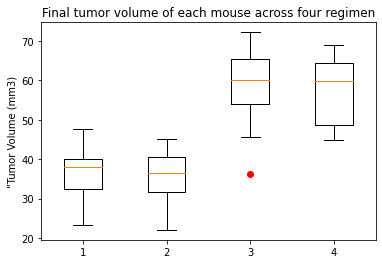

In [30]:

fig1, ax1 = plt.subplots()
ax1.set_title('Final tumor volume of each mouse across four regimen')
ax1.set_ylabel('"Tumor Volume (mm3)')
ax1.boxplot(Four_regimen,sym='ro')
plt.show()

## Line and Scatter Plots

In [31]:
Capomulin_regimen = clean_comdata_df.loc[clean_comdata_df["Drug Regimen"]=="Capomulin"]
First_Capomulin_Mice = Capomulin_regimen.groupby("Drug Regimen").first()
First_Capomulin_Mice_ID = First_Capomulin_Mice.iloc[0,0]
First_Capomulin_Mice_ID

's185'

In [32]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Find a mouse treated wtih Capomulin
Mice_treated_with_Capomulin_df = clean_comdata_df.loc[(clean_comdata_df["Drug Regimen"] == "Capomulin")]
Specific_Mouse_treated_with_Capomulin = Mice_treated_with_Capomulin_df.groupby("Drug Regimen").first()
Specific_Mouse_treated_with_Capomulin_ID = Specific_Mouse_treated_with_Capomulin.iloc[0,0]
Specific_Mouse_treated_with_Capomulin_ID
# Get date for that mouse
Mouse_treated_with_Capomulin_df = clean_comdata_df.loc[(clean_comdata_df["Drug Regimen"] == "Capomulin") &
                                                    (clean_comdata_df["Mouse ID"] == Specific_Mouse_treated_with_Capomulin_ID)]
#Mouse_treated_with_Capomulin_df
mouse_tumor_vols = Mouse_treated_with_Capomulin_df["Tumor Volume (mm3)"]
mouse_timepoints = Mouse_treated_with_Capomulin_df["Timepoint"]

In [33]:
mouse_timepoints 
print(f"Mouse Tumor Vol {mouse_tumor_vols}")
print(f"Mouse Timepoints {mouse_timepoints}")

Mouse Tumor Vol 10    45.000000
11    43.878496
12    37.614948
13    38.177232
14    36.866876
15    33.949940
16    32.959671
17    28.328531
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64
Mouse Timepoints 10     0
11     5
12    10
13    15
14    20
15    25
16    30
17    35
18    40
19    45
Name: Timepoint, dtype: int64


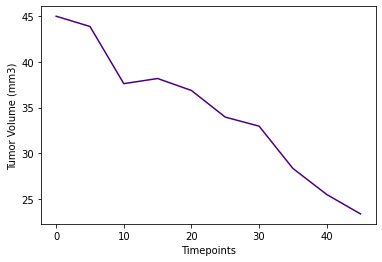

In [34]:
capomulin,=plt.plot(mouse_timepoints, mouse_tumor_vols, color="indigo", label="Timepoints")

#capomulin_tumor,=plt.plot(Capomulin_data["Mouse ID"], Capomulin_data["Tumor Volume (mm3)"], color="pink", label="Tumor Volume")
# Create a legend for our chart
plt.xlabel('Timepoints')
plt.ylabel('Tumor Volume (mm3)')
# Show the chart
plt.show()

In [35]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_regimen = clean_comdata_df.loc[clean_comdata_df["Drug Regimen"]=="Capomulin",:]
Capomulin_tumor_Mouse_id = Capomulin_regimen.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
Capomulin_weight_Mouse_id = Capomulin_regimen.groupby("Mouse ID")["Weight (g)"].mean()
Capomulin_weight_Mouse_id
Capomulin_weight_average_tumor = pd.merge(Capomulin_tumor_Mouse_id,Capomulin_weight_Mouse_id, on = "Mouse ID")
Capomulin_weight_average_tumor.columns=["Tumor Volume (mm3)","Weight (g)"]
Capomulin_weight_average_tumor.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


In [36]:
Capomulin_weight_average_tumor.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, b128 to y793
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Tumor Volume (mm3)  25 non-null     float64
 1   Weight (g)          25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 600.0+ bytes


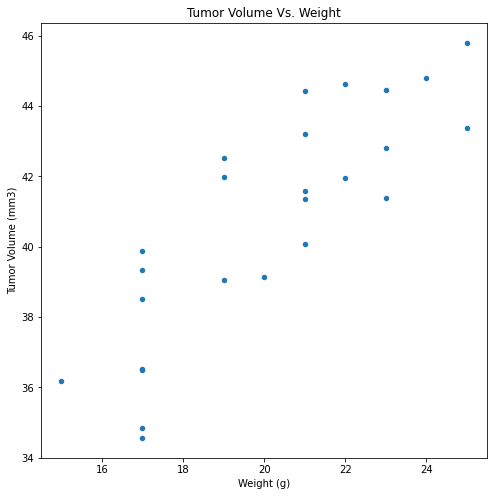

In [37]:
# Create a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
Capomulin_weight_average_tumor.plot(kind="scatter", x="Weight (g)", y="Tumor Volume (mm3)", grid=False, figsize=(8,8),
              title="Tumor Volume Vs. Weight")
plt.show()


## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
Capomulin_weight_average_tumor.head()

,Tumor Volume (mm3),Weight (g)
Mouse ID,,
b128,41.963636,22
b742,40.083699,21
f966,36.505973,17
g288,41.990097,19
g316,44.613344,22


In [39]:
# The next example will compute the Pearson correlation coefficient between "Tumor Volume" and "Weight"
tumor_volume = Capomulin_weight_average_tumor["Tumor Volume (mm3)"]
weight = Capomulin_weight_average_tumor["Weight (g)"]
correlation = st.pearsonr(weight,tumor_volume)
#print(f"The correlation between both factors is {round(correlation[0],2)}")


The correlation between both factors is 0.84


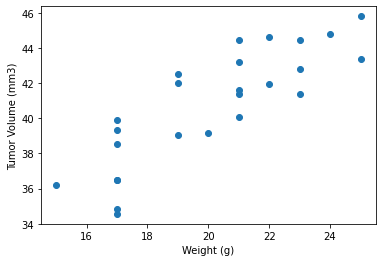

In [40]:
# Compare the calcualted Pearson's r to the plots
plt.scatter(weight,tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

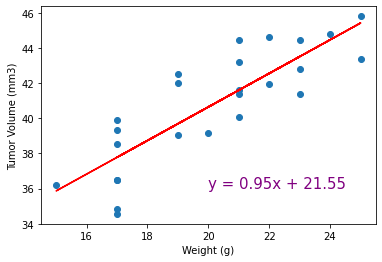

In [41]:
# Add the linear regression equation and line to plot
x_values = weight
y_values = tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="purple")
plt.xlabel('Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.show()

In [42]:
line_eq

'y = 0.95x + 21.55'